This file is part of Google Zero Day In the Wild Security Vulnerabilities Analysis Project. 
This script aims to analyze the time taken from the discovery of a vulnerability to its patching across different vendors. Identify which vendors are quicker or slower in addressing security issues.

Required Imports

In [11]:
import pandas as pd
import  matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

Data Preaparation and Data Cleaning

In [3]:
df = pd.read_csv('/Users/samir/Documents/GitHub/Google-Zero-Day-in-the-Wild-/0day _In the Wild_ - All.csv')
df.head()

,CVE,Vendor,Product,Type,Description,Date Discovered,Date Patched,Advisory,Analysis URL,Root Cause Analysis,Reported By
0,CVE-2024-23296,Apple,iOS,Memory Corruption,Arbitrary kernel r/w in RTKit,NaN,2024-03-06,https://support.apple.com/en-gb/HT214081,NaN,NaN,NaN
1,CVE-2024-23225,Apple,iOS,Memory Corruption,Out-of-bounds memory access in Kernel,NaN,2024-03-05,https://support.apple.com/en-gb/HT214081,NaN,NaN,NaN
2,CVE-2024-23222,Apple,WebKit,Memory Corruption,Type confusion,NaN,2024-01-22,https://support.apple.com/en-us/HT214059,NaN,NaN,NaN
3,CVE-2024-0519,Google,Chrome,Memory Corruption,Out-of-bounds memory access,2024-01-11,2024-01-16,https://chromereleases.googleblog.com/2024/01/...,NaN,NaN,NaN
4,CVE-2023-7024,Google,Chrome,Memory Corruption,Heap overflow in WebRTC,2023-12-19,2023-12-20,https://chromereleases.googleblog.com/2023/12/...,NaN,NaN,Clément Lecigne and Vlad Stolyarov of Google's...


Checking Null Values and droping rows where 'Date Discovered'values are missing.

In [4]:
missing_values = df.isnull().sum()
missing_values


CVE                      0
Vendor                   0
Product                  0
Type                     4
Description              0
Date Discovered        188
Date Patched             0
Advisory                 0
Analysis URL           139
Root Cause Analysis    245
Reported By             92
dtype: int64

In [5]:
df_cleaned = df.dropna(subset=['Date Discovered'])
df_cleaned.isnull().sum()
df_cleaned['Date Discovered'] = pd.to_datetime(df_cleaned['Date Discovered'], errors='coerce')
df_cleaned['Date Patched'] = pd.to_datetime(df_cleaned['Date Patched'], errors='coerce')
df_cleaned['Date Discovered']

/var/folders/89/xn87wdfs76x_gc0q1x5jl_4h0000gn/T/ipykernel_22912/1113253299.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date Discovered'] = pd.to_datetime(df_cleaned['Date Discovered'], errors='coerce')
/var/folders/89/xn87wdfs76x_gc0q1x5jl_4h0000gn/T/ipykernel_22912/1113253299.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Date Patched'] = pd.to_datetime(df_cleaned['Date Patched'], errors='coerce')


3     2024-01-11
4     2023-12-19
10    2023-11-24
16    2023-09-25
17    2023-09-12
         ...    
293   2015-04-18
294   2015-04-13
297   2015-01-14
298   2015-01-20
299   2015-01-16
Name: Date Discovered, Length: 124, dtype: datetime64[ns]

In [7]:
# Checking if 'Type' can be filled based on the 'Description' column or needs to be dropped
missing_type_rows =df_cleaned[df_cleaned['Type'].isnull()]

# Displaying the rows with missing 'Type' to determine the best course of action
missing_type_rows[['Description', 'Type']]

,Description,Type


Creating a new Column: Time to Patch(Days); and calculating it.

In [8]:
df_cleaned['Time to Patch (Days)'] = (df_cleaned['Date Patched'] - df_cleaned['Date Discovered']).dt.days

# Filter out entries where the 'Time to Patch' is negative or null
final_data = df_cleaned[(df_cleaned['Time to Patch (Days)'] >= 0) & (df_cleaned['Time to Patch (Days)'].notnull())]

# Displaying the updated dataframe
final_data[['Vendor', 'Product', 'Time to Patch (Days)']].head()

/var/folders/89/xn87wdfs76x_gc0q1x5jl_4h0000gn/T/ipykernel_22912/3953144736.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['Time to Patch (Days)'] = (df_cleaned['Date Patched'] - df_cleaned['Date Discovered']).dt.days


,Vendor,Product,Time to Patch (Days)
3,Google,Chrome,5.0
4,Google,Chrome,1.0
10,Google,Chrome,4.0
16,Google,Chrome,2.0
17,Apple,iOS,9.0


Calculating Average Patch Time per Vendor

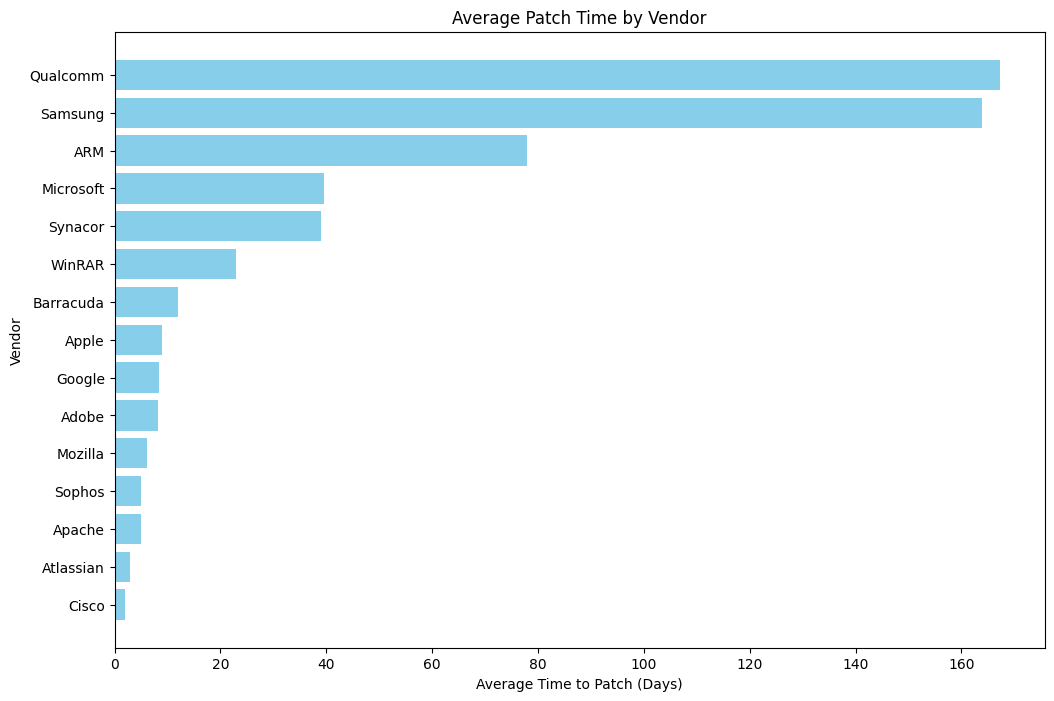

In [20]:
# Calculating the average patch time per vendor
average_patch_time_per_vendor = final_data.groupby('Vendor')['Time to Patch (Days)'].mean().sort_values()
plt.figure(figsize=(12, 8))
plt.barh(average_patch_time_per_vendor.index, average_patch_time_per_vendor.values, color='skyblue')
plt.title('Average Patch Time by Vendor')
plt.xlabel('Average Time to Patch (Days)')
plt.ylabel('Vendor')
plt.show()

Distribution of patch times for each Vendor.

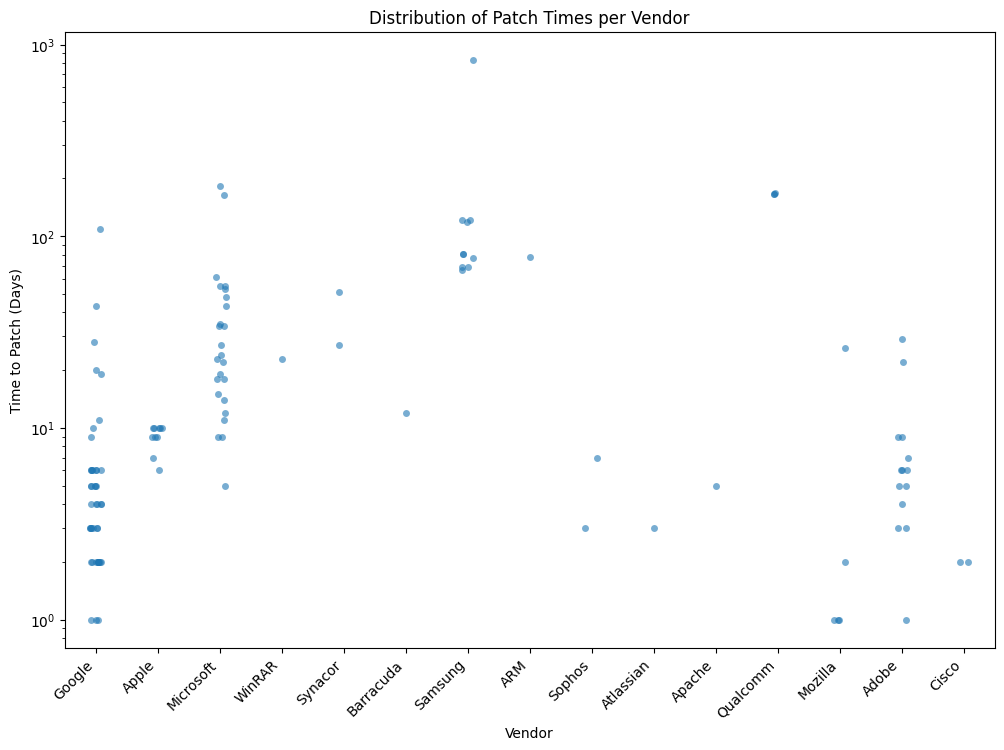

In [18]:
# Calculating the distribution of patch times for each vendor
patch_time_distribution_per_vendor = final_data.groupby('Vendor')['Time to Patch (Days)'].describe()
plt.figure(figsize=(12, 8))

sns.stripplot(x='Vendor', y='Time to Patch (Days)', data=final_data, jitter=True, dodge=True, marker='o', alpha=0.6)
plt.title('Distribution of Patch Times per Vendor')
plt.xlabel('Vendor')
plt.ylabel('Time to Patch (Days)')
plt.yscale('log')
plt.xticks(rotation=45, ha='right')
plt.show()

Checking if certain vulnerabilities take longer than expected patch times.

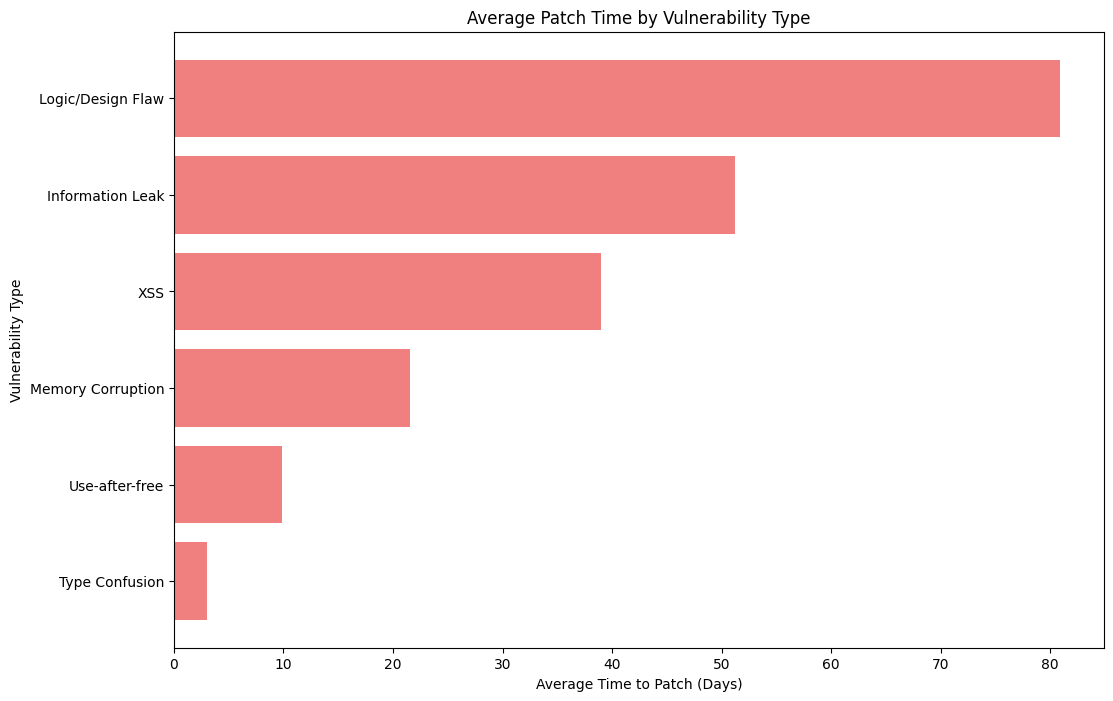

In [19]:
# Vulnerabilities and their Patch times in days
patch_time_by_type = final_data.groupby('Type')['Time to Patch (Days)'].mean().sort_values()
plt.figure(figsize=(12, 8))
plt.barh(patch_time_by_type.index, patch_time_by_type.values, color='lightcoral')
plt.title('Average Patch Time by Vulnerability Type')
plt.xlabel('Average Time to Patch (Days)')
plt.ylabel('Vulnerability Type')
plt.show()
